C:\Users\joabi\AppData\Local\Temp\ipykernel_24032\3327214559.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download('^GSPC', start='2010-01-01', end='2023-01-01')['Close'].squeeze()
[*********************100%***********************]  1 of 1 completed

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4238.91
Distribution:                  Normal   AIC:                           8485.83
Method:            Maximum Likelihood   BIC:                           8510.20
                                        No. Observations:                 3271
Date:                Tue, Jul 29 2025   Df Residuals:                     3270
Time:                        02:21:44   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0773  1.325e-02      5.836  5.362e-09 [5.135e-0

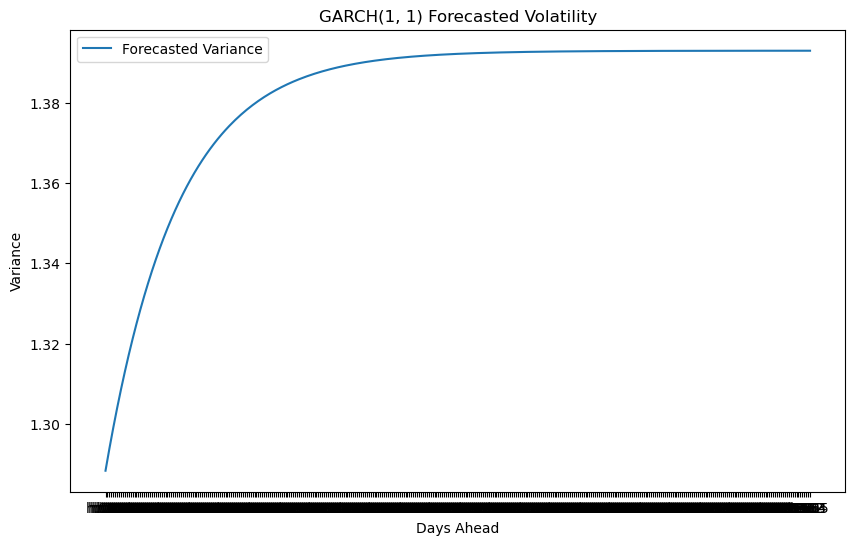

In [11]:
#GARCH Model for Volatility Forecasting


!pip install arch
from arch import arch_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

spy = yf.download('^GSPC', start='2010-01-01', end='2023-01-01')['Close'].squeeze()
returns = 100 * pd.Series(np.log(spy / spy.shift(1))).dropna()
# Fit GARCH(1, 1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit(disp="off")
# Print model summary
print(model_fit.summary())
# Forecast volatility
forecast = model_fit.forecast(horizon=365)
# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast.variance.iloc[-1], label='Forecasted Variance')
plt.title('GARCH(1, 1) Forecasted Volatility')
plt.xlabel('Days Ahead')
plt.ylabel('Variance')
plt.legend()
plt.show()

